In [ ]:
Name MONIN Donélia

In [ ]:
import math
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import skimage
import scipy.signal
import scipy.io as sio


## Introduction
We consider an image model where the observed image $y$ is a result of an degradation of an image $x$ by a linear transformation $f$, and some added noise $\eta$. This is the same as writing 
$$
mat(y)=f(mat(x)) + mat(\eta)
$$
where $mat(\cdot)$ is a notation used in this lab to underline that $f(mat(x))$ is an operation on a matrix $x$. However, a more common notation for this is 
$$
y= Ax + \eta
$$
where $A$ is the linear transformation and $x$, $y$ and $\eta$ are viewed as vectors. However, when working in imageprocessing the matrix $A$ will rearly be constructed, and we will not reshape the image $x$ as a vector.  It is important, as we will observe in the lab, that even though we use the notations $A$, we do not actually construct the matrix. 

 In this lab, we considerer that the noise, $\eta$ follows a multidimensional normal law of covarience $\sigma^2 I$ and where the mean is the zero vector.  $\eta \sim \mathcal{N}(0, \sigma^2 I)$ (more often denoted $\mathcal{N}(0, \sigma^2)$). The probability density function $p_\eta(\eta)$ is written as: 
\begin{equation}
 p_\eta(\eta) = \frac{1}{(2\pi\sigma)^{\frac{N}{2}}} \exp \left(-\frac{\|\eta\|_2^2}{2\sigma^2}\right)
\end{equation}
 where $N$ is the number of pixels, $\|\eta\|_p$ is the norm $l^p$ : 
 \begin{equation}
  \|\eta\|_p = \left(\sum_{i=1}^N |\eta|^p\right)^{\frac{1}{p}}
 \end{equation}
 
 We want to find the unknown image $x$ from the observation $y$. We use therefore the  maximum likelihood estimation which maximizes the likelihood $L(y,x)$ with respect to the unknown image $x$. This likelihood is equal to the  conditional probability of $y$ knowing $x$, denoted $p_{y|x}(y|x)$.  The probability is calculated from the image model, supposing that the $\eta$ is Gaussian white noise. 

\begin{equation}
 L(y,x) = p_{y|x}(y|x) = p_n(n=Ax - y) = \frac{1}{(2\pi\sigma)^{\frac{N}{2}}} \textrm{exp}\left(-\frac{\|Ax-y\|_2^2}{2\sigma^2}\right)
\end{equation}
We search for an estimation $\hat{x}$ of the real image $x$ by : 
\begin{equation}
 \hat{x} = \arg\max_x L(y,x)
\end{equation}
In order to avoid the difficulties related to the exponentiel, we often maximize the logarithm of the likelihood (which does not change the maximum argument since the logarithm is strictly increasing) :
\begin{equation}
 \hat{x} = \arg\max_x \, \ln(L(y,x)) = \arg\max_x \, \left(- \ln \left(2\pi\sigma \right)^{\frac{N}{2}} -\frac{1}{2\sigma^2}\|Ax-y\|_2^2\right)
\end{equation}


The term $- \ln \left( 2\pi\sigma \right)^{\frac{N}{2}}$ is a constant with respect to $x$, and thus does not intervien in the estimation of $\arg\max$
\begin{equation}
 \hat{x} = \arg\max_x \, \left( -\frac{1}{2\sigma^2}\|Ax-y\|_2^2\right)
\end{equation}
The last step removes the proptionality coefficent $\frac{1}{2\sigma^2}$ and the negative sign uses the fact that  $\arg\max_x -f(x) = \arg\min_x f(x)$ : 
\begin{equation}\label{eq:optim}
 \hat{x} = \arg\min_x \, \|Ax-y\|_2^2 
\end{equation}


Denote $J(x)=\|Ax-y\|_2^2 $. This term is in fact the Least Square term associated to the system $y = Ax$. The gradient of $J$, $\nabla J(x)= 2A^*(Ax-y)$, where $A^*$ is the adjoint operator of A. We deduce that  

$$ \nabla J(x)=0 \text{ for } x=(A^*A)^{-1}A^*y. $$

In order to find the minimum, we implement the gradient descent algorithm. The algorithm can be written as:
\begin{equation}
 x_{k+1} = x_k - \alpha 2 A^*(A x_k - y)
\end{equation}
avec $k = 0 \dots K-1$, $x_0 = y$ et $0 < \alpha \leq \frac{1}{2}$.

Complete the gradient descent function below and plot the cost function and the resulting image. If the cost function is not descending the whole time, you have done an error.

<ipython-input-2-329ff185f41c>:49: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.float_(np.fft.ifft2(H*np.fft.fft2(x)) + np.sqrt(sig2)*np.random.randn(end1[0],end1[1]))
<ipython-input-2-329ff185f41c>:57: ComplexWarning: Casting complex values to real discards the imaginary part
  xsol = np.float_(np.fft.ifft2(Hetoile*np.fft.fft2(y)/(abs(H)**2)))
<ipython-input-2-329ff185f41c>:72: ComplexWarning: Casting complex values to real discards the imaginary part
  gradJ = np.float_(2*np.fft.ifft2(Hetoile*np.fft.fft2(np.fft.ifft2(H*np.fft.fft2(xk)) - y)))


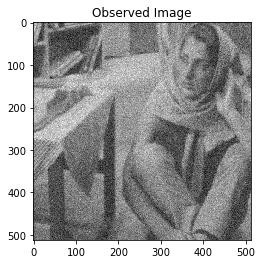

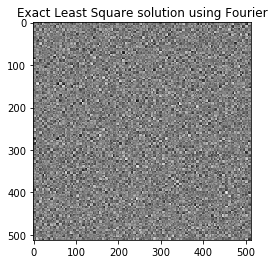

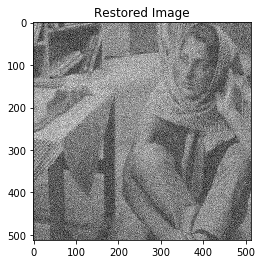

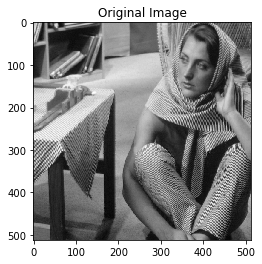

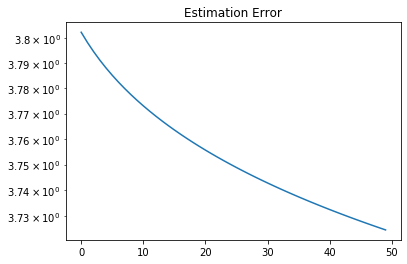

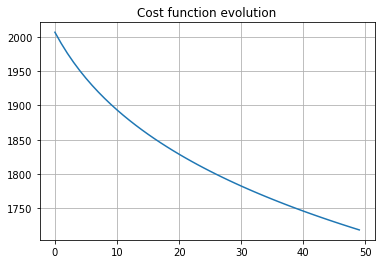

In [ ]:
def gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h


#==========================================================
#Compelete CODE
#==========================================================


 #-- Parameters
alpha = 0.1                      # Step
K = 50                           # Number of iteration
sig2 = 0.01                      # Variance of Gaussien noise


# -- Read Image
x = np.float64(plt.imread('barbara.png')) 
# -- Construction of H et H*
# H is a Gaussian low-pass filter of variance 1 
h = gauss2D( (11,11), 1)
stemp = np.shape(h)
s1 = np.int((stemp[0]-1)/2)
s2 = np.int((stemp[1]-1)/2)
end1=np.shape(x)

Hs = np.zeros(shape=np.shape(x));
Hs[0:s1 +1,0:s2+1] = h[s1:,s2:]
Hs[end1[0]-s1:,end1[1]-s2:] = h[0:s1,0:s2]
Hs[0:s1+1,end1[1]-s2:] = h[s1:,0:s2]
Hs[end1[0]-s1:,0:s2+1] = h[0:s1,s2:]



H = np.fft.fft2(Hs)       # H, Hx is calculated by ifft2(H.*fft2(x));
Hetoile = H.conj()  # H*, H*x  is calculated by ifft2(Hetoile.*fft2(x));

# % -- Construction of observed image y
y = np.float_(np.fft.ifft2(H*np.fft.fft2(x)) + np.sqrt(sig2)*np.random.randn(end1[0],end1[1]))
# plot y
plt.figure()
plt.imshow(y,cmap='gray') 
plt.title('Observed Image')


# -- Exact Least Square solution using Fourier
xsol = np.float_(np.fft.ifft2(Hetoile*np.fft.fft2(y)/(abs(H)**2)))
plt.figure()
plt.imshow(xsol,cmap= 'gray') 
plt.title('Exact Least Square solution using Fourier')


# -- Gradient Descent algo
# Initialisation
xk = y;
J = np.zeros(shape=( K));    # Cost
err = np.zeros(shape=(K));  # Error 
# Boucle principale
k=0;
while k <K :
  #  gradient
    gradJ = np.float_(2*np.fft.ifft2(Hetoile*np.fft.fft2(np.fft.ifft2(H*np.fft.fft2(xk)) - y)))
    # update xk
    xk = (xk - gradJ*alpha)
    # Calculate cost and Error
    J[k] = (np.linalg.norm(np.fft.ifft2(H*np.fft.fft2(xk)) - y))**2   # fonction Cost
    err[k] = np.sqrt(J[k])  # error between xk and the original image
    k=k+1



# -- plots
# Restored Image 
plt.figure()
plt.imshow(xk,cmap= 'gray') 
plt.title('Restored Image')
# Original Image 
plt.figure()
plt.imshow(x,cmap= 'gray') 
plt.title('Original Image')
# Estimation Error
plt.figure()
plt.semilogy(np.log(err)) 
plt.title('Estimation Error')

# Cost Function 
plt.figure()
plt.plot(J)
plt.title('Cost function evolution')
plt.grid(True)

How do you explain the results? (Comment on Cost function, error, and the obtained image)


We obtained an image with noisy. We see that the inverse transformation adds some noise to the image. During iterations, the cost function decreases. The error values decreases too.  In fact, with the gradient descent, we approach more and more the minimum value, so the likelihood maximization.

### Regularisation

As we can observe from the above example, the minimization of the least square term does not yield good results when we have noisy data. Since the problem is ill posed we must add a regularisation term to the minization. The choice of regularization depends on the image model.
Natural images are piecewise constant. Thus the norm of the gradient should be quite small. For this we choose: 

$$
 p_x(x) = \frac{1}{Z} \exp (-\lambda \|\nabla x\|_2^2)
$$
where $Z$ is a normalization constant and $\lambda$ is a regularization factor. We will now use the maximum a posteriori estimation. This estimation maximises the conditional probability of $x$ knowing $y$, denoted 
 $p_{x|y}(x|y)$:
$$
 \hat{x} = \arg\max_x \, \ln(p_{x|y}(x|y))
$$

Bayes law states that $p_{x|y}(x|y)$ is proportional to  $p_{y|x}(y|x)p_x(x)$, and thus :
\begin{align}
 \hat{x} &= \arg\max_x \, \ln(p_{y|x}(y|x)p_x(x)) = \arg\max_x \, \ln(p_{y|x}(y|x)) + \ln(p_x(x)) \nonumber \\
	&=  \arg\max_x \, \left( -\|Ax-y\|_2^2 - \lambda \|\nabla x\|_2^2\right)
\end{align}
Using the same techiques as before we obtain:

\begin{equation}\label{eq:optim2}
 \hat{x} =  \arg\min_x \,  \|Ax-y\|_2^2 + \lambda \|\nabla x\|_2^2
\end{equation}
where $\lambda$ is a regularization parameter that controls the weight of the regularization.

Let  $J(x) = \|Ax-y\|_2^2 + \lambda \|\nabla x\|_2^2$, the gradient is defined by
$$
$\nabla J(x)= 2A^*(Ax-y)  -2\lambda \Delta x 
$$
where $\Delta$ is the laplacian function (The divergence of the gradient).

Implement the gradient descent alogrithm

\begin{equation}
 x_{k+1} = x_k - \alpha \nabla J(x_k)
\end{equation}
with $\lambda = 1$ et $0 < \alpha \leq \frac{1}{2(1 + 8\lambda)}$,


<ipython-input-3-0491a957730d>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.float_(np.fft.ifft2(H*np.fft.fft2(x)) + np.sqrt(sig2)*np.random.randn(end1[0],end1[1]))
<ipython-input-3-0491a957730d>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  gradJ =  np.float_(2*np.fft.ifft2(Hetoile*np.fft.fft2(np.fft.ifft2(H*(xk)) - y)))


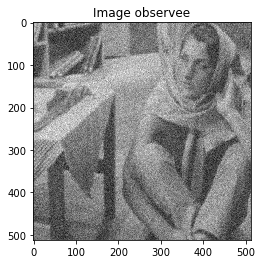

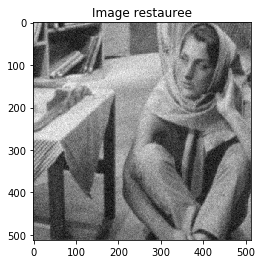

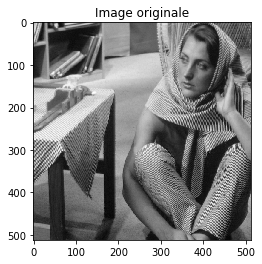

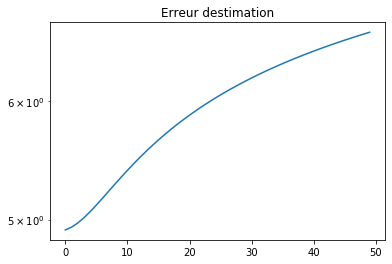

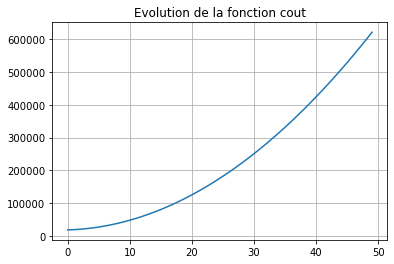

In [ ]:
def grad2(u):
    
    dx=np.zeros(shape=np.shape(u));
    dy=np.zeros(shape=np.shape(u));
    dx[:,0:-1] = u[:,1:]-u[:,0:-1];
    dy[0:-1,:]= u[1:,:]-u[0:-1,:];
    return dx, dy;

def div2(dx,dy):
    d1=np.zeros(shape=np.shape(dx));
    d2=np.zeros(shape=np.shape(dx));
    d1[:,1:-1]=dx[:,1:-1]-dx[:,0:-2];
    d1[:,0]=dx[:,0];
    d1[:,-1]=-dx[:,-1];
    d2[1:-1,:]=dy[1:-1,:]-dy[0:-2,:];
    d2[0,:]=dy[0,:];
    d2[-1,:]=-dy[-1,:];
    return d1+d2;

lambd= 1
alpha = 0.03                   # gradient descent step
K = 50                         # number of iterations of gradient descent
sig2 = 0.01                      # Variance of the additive Gaussian noise  

# -- Lecture de l'image
x = np.float64(plt.imread('barbara.png')) # load the real image x 


# % -- Construction of the observed image y 
y = np.float_(np.fft.ifft2(H*np.fft.fft2(x)) + np.sqrt(sig2)*np.random.randn(end1[0],end1[1]))
# AShow the observed image y
plt.figure()
plt.imshow(y,cmap='gray') 
plt.title('Image observee')


# -- Gradient descent 
# Initialization
xk = y;
J = np.zeros(shape=( K));    # Cost function 
err = np.zeros(shape=(K));  # Error w.r.t the original image
# Main loop
k=0;
while k <K :
    # Computation of the gradient
    gradJ =  np.float_(2*np.fft.ifft2(Hetoile*np.fft.fft2(np.fft.ifft2(H*(xk)) - y)))
    # update xk
    xk = (xk - gradJ*alpha)
    # Computation of the error and the cost function  
    J[k] = (np.linalg.norm(np.fft.ifft2(H*np.fft.fft2(xk)) - y))**2 + lambd*(np.linalg.norm(div2(xk,y))**2)  # fonction cout
    err[k] = np.sqrt(J[k])  # erreur entre xk et l'image originale
    k=k+1


# -- Display
# restored Image 
plt.figure()
plt.imshow(xk,cmap= 'gray') 
plt.title('Image restauree')
# Original Image 
plt.figure()
plt.imshow(x,cmap= 'gray') 
plt.title('Image originale')
# Error of estimation
plt.figure()
plt.semilogy(np.log(err)) 
plt.title('Erreur d''estimation')

# Cost Fonction 
plt.figure()
plt.plot(J)
plt.title('Evolution de la fonction cout')
plt.grid(True)


Observe the image, and compare it to the true image (error).

Compare the solution with the one without regularization and comment.

Modify $\lambda$ to observe the influece. 

Here, we see that the cost function increases but we have less noise in the image. When we increase lambda, it smooths more the image in order to reduce the noise effect.

# Second part: Dictionary learning. 

The SparseLandTool are needed. You can install it using 

pip install sparselandtools --user


In [ ]:
!pip install sparselandtools 

In [ ]:
##Usefull codes
from sparselandtools.pursuits import MatchingPursuit
from sparselandtools.dictionaries import DCTDictionary 

def omp(D,y,L):
    n,P=y.shape;
    n,K=D.shape;
    Dtrans=D.transpose()
    A=np.zeros([K,P])
    for k in range(P):
        a=[]
        y1=y[:,k]
        residual=y1;
        indx=np.zeros(L,dtype=int);
        count=0
        for j in range(L):
            proj=Dtrans@residual
            pos=np.argmax(np.abs(proj))
            indx[j]=int(pos)
            ind=indx[0:j+1]
            temp1 = D[:,ind]
            a=np.linalg.pinv(temp1)@y1
            r1= temp1@a
            residual=y1-r1
            count+=1
            if np.sum(residual**2) < 1e-6:
                break
        temp=np.zeros(K)
        temp[indx[0:count]]=a
        A[:,k]=temp.transpose()

    return A

def im2col(x,hh,ww):

    """
    Args:
      x: image matrix to be translated into columns, (C,H,W)
      hh: window (patvh) height
      ww: window width
      stride: stride
    Returns:
      col: (new_h*new_w,hh*ww*C) matrix, each column is a cube that will convolve with a filter
            new_h = (H-hh) // stride + 1, new_w = (W-ww) // stride + 1
    """

    h,w = x.shape
    new_w= hh*ww
    col = np.zeros([new_w,(h*w)//new_w])
    z=0
    for i in range(0,h,hh):
        for j in range(0,w,ww):
           patch = x[i:i+hh,j:j+ww]
           col[:,z] = patch.flatten('F')
           z+=1
    return col



def col2im(B,psize,image_size):
    mm,nn = image_size
    ww,hh= psize
    newIm = np.zeros([mm,nn])
    z=0
    for i in range(0,mm,ww):
        for j in range(0,nn,hh):
            b=B[:,z]
            b2=np.reshape(b,[ww, hh]).T
            newIm[i:i+ww,j:j+hh]=b2
            z+=1
    return newIm



def Dict_to_img(Dict):
    """
    Transforms the dictionary columns into patches and orders them for plotting purposes.
    Returns:
        Reordered dictionary matrix
     """
    # dictionary dimensions
    D=np.copy(Dict)
    n, K = D.shape
    M = np.copy(D)
    # stretch atoms
    for k in range(K):
        M[:, k] = M[:, k] - (M[:, k].min())
        if M[:, k].max():
            M[:, k] = M[:, k] / D[:, k].max()

    # patch size
    n_r = int(np.sqrt(n))

    # patches per row / column
    K_r = int(np.sqrt(K))

    # we need n_r*K_r+K_r+1 pixels in each direction
    dim = n_r * K_r + K_r + 1
    V = np.ones((dim, dim)) * np.min(D)

    # compute the patches
    patches = [np.reshape(D[:, i], (n_r, n_r)) for i in range(K)]

    # place patches
    for i in range(K_r):
        for j in range(K_r):
            V[j * n_r + 1 + j:(j + 1) * n_r + 1 + j, i * n_r + 1 + i:(i + 1) * n_r + 1 + i] = patches[i * K_r + j]
    return V

The idea behind dictionary learning is to find a matrix, a dictionary, $D$, so that a signal, $y$, can be represented as $Dx$, where $x$ is sparse. A vector is sparse if the number of non-zero components is low. 

The problem can be written as 
$$
\min_{x,D} \frac{1}{2}\|y-Dx\|^2 \text{ such that } \|x\|_0\leq k
$$

where $\|\cdot\|_0$ is a the $\ell_0$ pseudo norm defined as 
$$\|x\|_0=\#\{x_i , i=1,\cdots N : x_i\neq 0\}.$$



### Minimize X

We will in the first part only look at the minimization with respect to $x$.
There are many ways to solve the problem 
$$
\min_{x} \frac{1}{2}\|y-Dx\|^2 \text{ such that } \|x\|_0\leq k
$$
We will use the Orthogonal Matching Pursuit (omp) algorithm to obtain $\hat{x}$. Note that the minimization problem is not convex and is NP-Hard. 
We will use the already defined algorithm (omp) to do the minimization 



In this part we fix $D$ as a Discrete Cosine transformation matrix, as this is a well known dictionary to use in compression. We first observe y, a patch image which is composed of two elements of the dictionary itself. Try to retrieve the right elements from the non noisy observation and the dictionary.

2.1 Play with the parameter spars which represents $k$. 

2.2 For which $k$ do you obtain the best reconstruction? Is this logical?

A small value for k is necessary, but not too small to avoid too much sparsity. When spars is equal to 8, we still have a lot of noise while with 1, its too sparse. The best result is obtained with spars=4.

In the second part, consider the noisy observation and answer again the two questions

You have below the elements you need

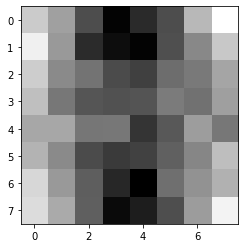

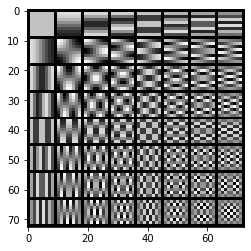

[[ 2  0]
 [17  0]
 [18  0]
 [60  0]]
[[[ 4.88365797]
  [ 0.        ]]

 [[-0.41996258]
  [ 0.        ]]

 [[ 1.78047284]
  [ 0.        ]]

 [[-0.4442665 ]
  [ 0.        ]]]


In [ ]:
def y2im(B,psize=[8,8]):
    ww,hh= psize
    newIm = np.zeros([ww,hh])
    for j in range(0,hh):
        b=B[ww*j:ww*(j+1)]
        b2=b.T
        newIm[j,:]=b2
    return newIm


spars= 4


# find sparse representation of y in a DCT-dictionary using MatchingPursuit
d = DCTDictionary(16, 16)


# Loading DCT matrix
test = sio.loadmat('DCT1.mat')
Dctmatrix = test['DCT1']

## Import Noisy and Clean vector
test = sio.loadmat('yClean.mat')
yClean = np.concatenate(test['yClean'])
test = sio.loadmat('yNoise.mat')
yNoisy = np.concatenate(test['yNoise'])


## Observe yNoise: 
yview=y2im(yNoisy)
plt.imshow(yview, cmap='gray')
plt.show()

## Observe the dictionary
plt.imshow(Dict_to_img(Dctmatrix),cmap='gray')
plt.show()


## find sparse representation of y in a DCT-dictionary using OMatchingPursuit
a=omp(Dctmatrix,np.array([yNoisy]).T,spars)


position= np.argwhere(a) ## Where in a we can find nonzero elements
print(position)
print(a[position])

## Minimize D
Once the sparse coefficients $x$ have been computed, one can udpate the dictionary. This is achieve by performing the minimization
$$
\min_D \frac{1}{2}‖y−Dx‖^2.
$$
Calculating the gradient of $J(D)=\frac{1}{2}\|y-Dx\|^2$ yields
$$
\nabla J= (y-Dx)x^*
$$
where $x^*$ is the adjoint. 
One way to obtain the minimum is to calculate it directly using $\nabla J=0$.  We add in the inversion a diagonal matrix with small values $(10^{-7})$ to ensure the inversion. Furthermore, we ensure that the normalization of the columns of $D$ is done without any zero-division.

There are other and more sophisticated ways to update, such as the K-SVD method,mainly designed for high dimensional problems, but we will not go into this here.

Finish the program optD, that solves the above minimization problem, using the fact that the minimum is obtained when $\nabla J=0$

In [ ]:
def optD(x,y):
    xtrans=x.transpose()
    n1,n2 =x.shape
    eps=1e-10
    D=y@xtrans
    d1,d2=D.shape
    sumDictElems=np.sum(np.abs(D),0)
    zerosIdx=np.where(sumDictElems<eps);
    D[:,zerosIdx[0]] = np.random.randn(d1,len(zerosIdx[0]));
    D=D@np.diag(1/np.sqrt(np.sum(D*D,0)));
    return D




## Training 

In this part we will take the step to go from a 1-dimensional signal, to an image. If we only have one image, and we  want to do dictionary learning, we will have to divide the images into patches of $b\times b$ small images. These patches can be overlapping. This provides us with sufficient training data.  In this lab we will use one tenth of the patches possible to take from the image.  

The problem can be written as either 
$$
\sum_i\|y_i-Dx_i\|^2
$$
or 
$$
\|Y-DX\|^2_{Fro}
$$
where $Y=[y_1...y_m], y_i\in R^n$, $D\in R^{n\times p}$ and $X=[x_1...x_m], x_i\in R^{p}$.


We take here patches of $8\times 8$ (n=8*8=64), and we choose to use 121 atoms (p=121).
We train our image on Barbara. 

### Algorithm
         find X using OMP
         find Dict using optD
         repeate
The algorithm above describes how to solve the minimization problem. It is known as an alternating algorithm as we fix D, and minimize with respect to X. Then we fix X, and minimize with respect to D. 
In this example we use the trainingset obtained using Matlab (trainingData) and the function im2col. 


Finish the algorithm in the while loop. 
I reccomend you to start with an nbIter small (5-10) and observe the costfunction to be sure that the algorithm minimize the function properly. 

In [ ]:
bb=8  # block size of each patch
K=121 # number of atoms in the dictionary

spars=4
nbIter=50

IMin0=np.float64(plt.imread('barbara.png'))

#TrainingData=im2col_sliding_strided(IMin0,[bb,bb],10) ##Choosing each 10 patch.

test = sio.loadmat('trainingdata.mat')

TrainingData = test['TrainData']/255


#d = DCTDictionary(bb, int(np.sqrt(K)))
test = sio.loadmat('DCT2.mat')
Dict = test['Dict']


bb=8  # block size of each patch
K=121 # number of atoms in the dictionary
spars=4 #Trained sparsity
CostTot=np.zeros(2*nbIter)
i=0
while i < 2*nbIter:
   j=0
   X=omp(Dict, TrainingData, spars)
   CostTot[i]=np.linalg.norm(TrainingData - Dict@X)**2
   i+=1
   Dict=optD(X, TrainingData)
   CostTot[i]= np.linalg.norm(TrainingData - Dict@X)**2
   i+=1



Here we plot the cost function and the obtained dictionary

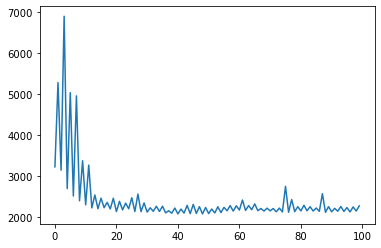

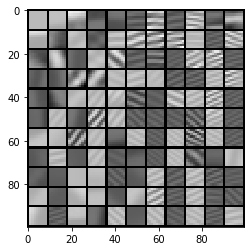

In [ ]:
plt.plot(CostTot)
plt.show()
plt.imshow(Dict_to_img(Dict),cmap='gray')
plt.show()


## Now the dictinoary is trained! 

Now we will use the trained dictionary to find a sparse representation of our image, $Barbara$. 
We rewrite our image as the same form as the trainingdata (by patches of $b \times b$), and do a minimization over $X$ using the dictionary obtain previously. 

In [ ]:
spars=4

TData= im2col(IMin0,bb,bb)
X2= omp(Dict, TData, spars)


$X2$ is the sparse representation of the image. To reconstruct our image, it suffices to do $Dx$ and reshape the result into an image. 

In [ ]:
##Reconstruct image
ynew1= Dict@X2
ynew2 = col2im(ynew1,[bb, bb], IMin0.shape)


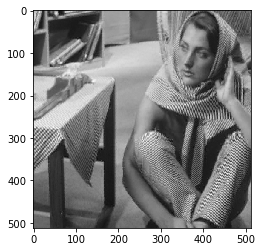

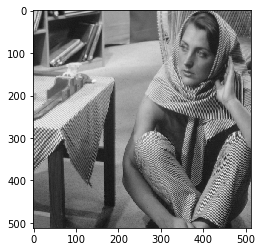

In [ ]:
plt.imshow(ynew2, cmap='gray',vmin=0, vmax=1)
plt.show()
plt.imshow(IMin0, cmap='gray', vmin=0, vmax=1)
plt.show()

Play around with the spars variable. What happens if spars=1, and what happens if spars= 10?

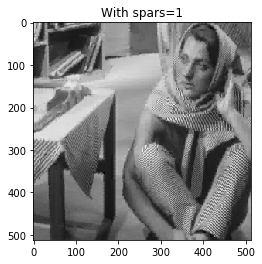

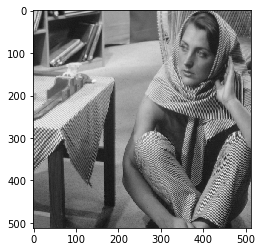

In [ ]:
spars=1

TData= im2col(IMin0,bb,bb)
X2= omp(Dict, TData, spars)
##Reconstruct image
ynew1= Dict@X2
ynew2 = col2im(ynew1,[bb, bb], IMin0.shape)
plt.imshow(ynew2, cmap='gray',vmin=0, vmax=1)
plt.title("With spars=1")
plt.show()
plt.imshow(IMin0, cmap='gray', vmin=0, vmax=1)
plt.show()

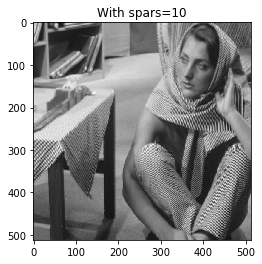

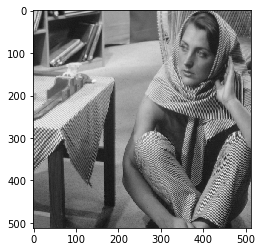

In [ ]:
spars=10

TData= im2col(IMin0,bb,bb)
X2= omp(Dict, TData, spars)
##Reconstruct image
ynew1= Dict@X2
ynew2 = col2im(ynew1,[bb, bb], IMin0.shape)
plt.imshow(ynew2, cmap='gray',vmin=0, vmax=1)
plt.title("With spars=10")
plt.show()
plt.imshow(IMin0, cmap='gray', vmin=0, vmax=1)
plt.show()


With spars = 1, we still have too much noise. However, with a value of spars = 10, we get a more satisfactory result, close to the one with spars = 4. We have to use the golden mean.

The function Dict_to_img regroups the Dictionary so that we can observe the patches of the Dictionary. 
If $x$ has only 3 non-zero components at $i,j,z$, it means that it used the ith, jth and zth patch from the dictionary you observe.

Knowing this, how do you justify the dictionary obtained. 
